In [166]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')

x=pd.read_csv(r"C:\Users\rishi\ml_projects\climate\points_arr.csv",header=None).to_numpy()
y=pd.read_csv(r"C:\Users\rishi\ml_projects\climate\points_arr_4.csv",header=None).to_numpy()

In [167]:
def peri(arr,x=x):
    new_arr=[]
    arr=np.reshape(arr,(480,1))
    for i in range(len(arr)):
        if(x[i]==0):
            continue
        else:
            new_arr.append(arr[i])
    return np.array(new_arr)


In [168]:
exclude_vals=[]
total_count=-1
for i in range(2018, 2024):
    dir_path = fr"C:\Users\rishi\ml_projects\climate\{i}_data\NTL"
    filenames = os.listdir(dir_path)

    month_mapping = {
        'January': 1, 'February': 2, 'March': 3, 'April': 4,
        'May': 5, 'June': 6, 'July': 7, 'August': 8,
        'September': 9, 'October': 10, 'November': 11, 'December': 12
    }

    # Sort the filenames based on the month extracted from the filename
    sorted_filenames = sorted(filenames, key=lambda x: month_mapping[x.split('_')[0]])
    for filename in sorted_filenames:
        total_count+=1
        filepath = os.path.join(dir_path, filename)
        df = pd.read_csv(filepath, index_col=0)
        count=0
        for _, row in df.iterrows():
            count += (row == 0).sum()
        if(count>=df.shape[0]*df.shape[1]/5):
            exclude_vals.append(total_count)
            print(print(f"year: {i} , month :{filename}, {total_count}"))

year: 2018 , month :July_NTL.csv, 1
None
year: 2019 , month :July_NTL.csv, 13
None
year: 2019 , month :September_NTL.csv, 15
None
year: 2022 , month :July_NTL.csv, 49
None
year: 2023 , month :July_NTL.csv, 61
None
year: 2023 , month :September_NTL.csv, 63
None


In [169]:
total_count=-6
for i in range(2018, 2024):
    dir_path = fr"C:\Users\rishi\ml_projects\climate\{i}_data\nlst_scaled"
    filenames = os.listdir(dir_path)

    month_mapping = {
        'January': 1, 'February': 2, 'March': 3, 'April': 4,
        'May': 5, 'June': 6, 'July': 7, 'August': 8,
        'September': 9, 'October': 10, 'November': 11, 'December': 12
    }

    # Sort the filenames based on the month extracted from the filename
    sorted_filenames = sorted(filenames, key=lambda x: month_mapping[x.split('_')[0]])
    for filename in sorted_filenames:
        total_count+=1
        filepath = os.path.join(dir_path, filename)
        df = pd.read_csv(filepath, index_col=0)
        count=0
        for _, row in df.iterrows():
            count += (row == 0).sum()
        if(count>=df.shape[0]*df.shape[1]/5):
            exclude_vals.append(total_count)
            print(print(f"year: {i} , month :{filename}, {total_count}"))

year: 2018 , month :July_NLST.csv, 1
None
year: 2018 , month :August_NLST.csv, 2
None
year: 2019 , month :July_NLST.csv, 13
None
year: 2019 , month :September_NLST.csv, 15
None
year: 2020 , month :July_NLST.csv, 25
None
year: 2020 , month :August_NLST.csv, 26
None
year: 2021 , month :September_NLST.csv, 39
None
year: 2023 , month :July_NLST.csv, 61
None
year: 2023 , month :September_NLST.csv, 63
None


In [170]:
exclude_vals=list(set(exclude_vals))
exclude_vals.sort()
exclude_vals

[1, 2, 13, 15, 25, 26, 39, 49, 61, 63]

In [171]:
def filter_pollutant_values(pollutant_values, exclude_indices):
    return [value for i, value in enumerate(pollutant_values) if i not in exclude_indices]

In [172]:
pollutant_values = {
    'HCHO': [],
    'O3': [],
    'NO2': [],
    'CO': [],
    'SO2': [],
    'nlst_scaled': [],
    'ndvi_scaled': [],
    'NTL': []
}

pols = ['HCHO', 'O3', 'NO2', 'CO', 'SO2','nlst_scaled','ndvi_scaled','NTL']
for i in range(2018, 2024):
    for pol in pols:
        dir_path = fr"C:\Users\rishi\ml_projects\climate\{i}_data\{pol}"
        filenames = os.listdir(dir_path)

        month_mapping = {
            'January': 1, 'February': 2, 'March': 3, 'April': 4,
            'May': 5, 'June': 6, 'July': 7, 'August': 8,
            'September': 9, 'October': 10, 'November': 11, 'December': 12
        }
        
        # Sort the filenames based on the month extracted from the filename
        sorted_filenames = sorted(filenames, key=lambda x: month_mapping[x.split('_')[0]])
        for filename in sorted_filenames:
            filepath = os.path.join(dir_path, filename)
            df = pd.read_csv(filepath, index_col=0)
            #val = df.stack()
            temp = [val for sublist in df.to_numpy() for val in sublist]
            cleared=peri(temp,x=x)
            # Append the value to the appropriate list based on the pollutant type
            pollutant_values[pol].append(np.nanmean(cleared))

# Now you have the values stored in the corresponding lists
HCHO_vals = pollutant_values['HCHO'][5:]
CO_vals = pollutant_values['CO'][5:]
O3_vals = pollutant_values['O3'][5:]
NO2_vals = pollutant_values['NO2'][5:]
SO2_vals=pollutant_values['SO2'][5:]
NDVI_vals=pollutant_values['ndvi_scaled'][5:]
NLST_vals=pollutant_values['nlst_scaled'][5:]
NTL_vals=pollutant_values['NTL']

HCHO_vals_copy = pollutant_values['HCHO'][5:]
CO_vals_copy = pollutant_values['CO'][5:]
O3_vals_copy = pollutant_values['O3'][5:]
NO2_vals_copy = pollutant_values['NO2'][5:]
SO2_vals_copy=pollutant_values['SO2'][5:]
NDVI_vals_copy=pollutant_values['ndvi_scaled'][5:]
NLST_vals_copy=pollutant_values['nlst_scaled'][5:]
NTL_vals_copy=pollutant_values['NTL']


HCHO_vals = filter_pollutant_values(HCHO_vals, exclude_vals)
CO_vals = filter_pollutant_values(CO_vals, exclude_vals)
O3_vals = filter_pollutant_values(O3_vals, exclude_vals)
NO2_vals = filter_pollutant_values(NO2_vals, exclude_vals)
SO2_vals = filter_pollutant_values(SO2_vals, exclude_vals)
NDVI_vals = filter_pollutant_values(NDVI_vals, exclude_vals)
NLST_vals = filter_pollutant_values(NLST_vals, exclude_vals)
NTL_vals = filter_pollutant_values(NTL_vals, exclude_vals)
print(HCHO_vals)
print(CO_vals)
print(O3_vals)
print(NO2_vals)
print(SO2_vals)
print(NLST_vals)
print(NDVI_vals)
print(NTL_vals)

[0.00018292526247018154, 0.00016313633605017776, 0.00018800605357678128, 0.00019572694836819622, 0.00018093623357339996, 0.00017817692287275377, 0.00020414828632050753, 0.00021857907995577003, 0.00024452008274233753, 0.00026792082080642375, 0.0001868915265731125, 0.0001293133994749588, 0.00015421266762127752, 0.00017384361053695752, 0.0001555689756969049, 0.00016760473981771627, 0.0001806767074412598, 0.000217755671474105, 0.00022343763430394, 0.00025768741197675007, 0.00016069721768867455, 0.00014239436445673265, 0.00017102811370927376, 0.00018891561076083628, 0.0001771477175679539, 0.00017952056550706624, 0.00021460903462861502, 0.00024529980637447873, 0.0002441848122543375, 0.00022240719445103, 0.000154306781723744, 0.0001435433518508468, 0.00013449954913081049, 0.00017225442397825376, 0.00017130041842387494, 0.00017938608270919124, 0.00017247445421158, 0.0001843304175963084, 0.00023437702675432377, 0.00027019684712281124, 0.0002486154629877463, 0.00019320711326140626, 0.00012768020

In [173]:
len(NO2_vals)

57

In [174]:
cleared.shape

(80, 1)

In [175]:
len(NTL_vals)

57

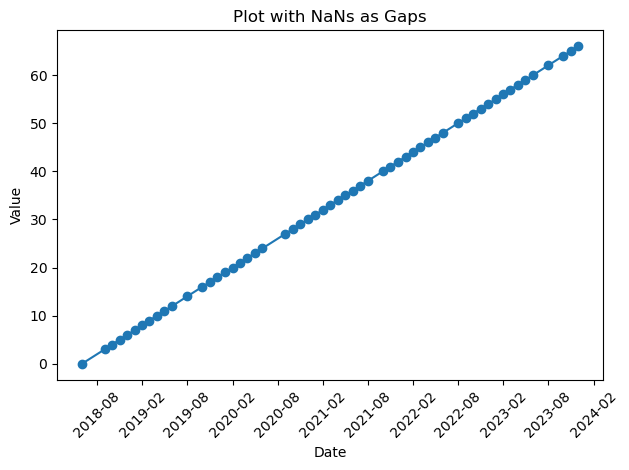

In [176]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Set start and end dates
start_date = '2018-06-01'
end_date = '2023-12-31'

# Generate a list of months over the period
months = pd.date_range(start=start_date, end=end_date, freq='MS').strftime("%Y-%m").tolist()

months = [month if i not in exclude_vals else np.nan for i, month in enumerate(months)]
values = [i for i in range(len(months))]  # Dummy values for plotting

# Filter out NaNs for plotting
plot_dates = [np.datetime64(date) for date in months if pd.notnull(date)]
plot_values = [value for date, value in zip(months, values) if pd.notnull(date)]

# Plot the data with gaps
plt.plot(plot_dates, plot_values, marker='o', linestyle='-')

# Set x-axis date format to display month and year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))  # Adjust interval as needed

plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Plot with NaNs as Gaps')

# Rotate date labels for readability
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [177]:
def scale(array):
    array=np.array(array)
    new_array=(array - array.min()) / (array.max() - array.min())
    return new_array

In [178]:
HCHO_scaled=scale(HCHO_vals_copy)
O3_scaled=scale(O3_vals_copy)
NO2_scaled=scale(NO2_vals_copy)
CO_scaled=scale(CO_vals_copy)
SO2_scaled=scale(SO2_vals_copy)
NLST_scaled=scale(NLST_vals_copy)
NDVI_scaled=scale(NDVI_vals_copy)
NTL_scaled=scale(NTL_vals_copy)
HCHO_scaled.shape

(67,)

In [179]:
NO2_scaled.shape

(67,)

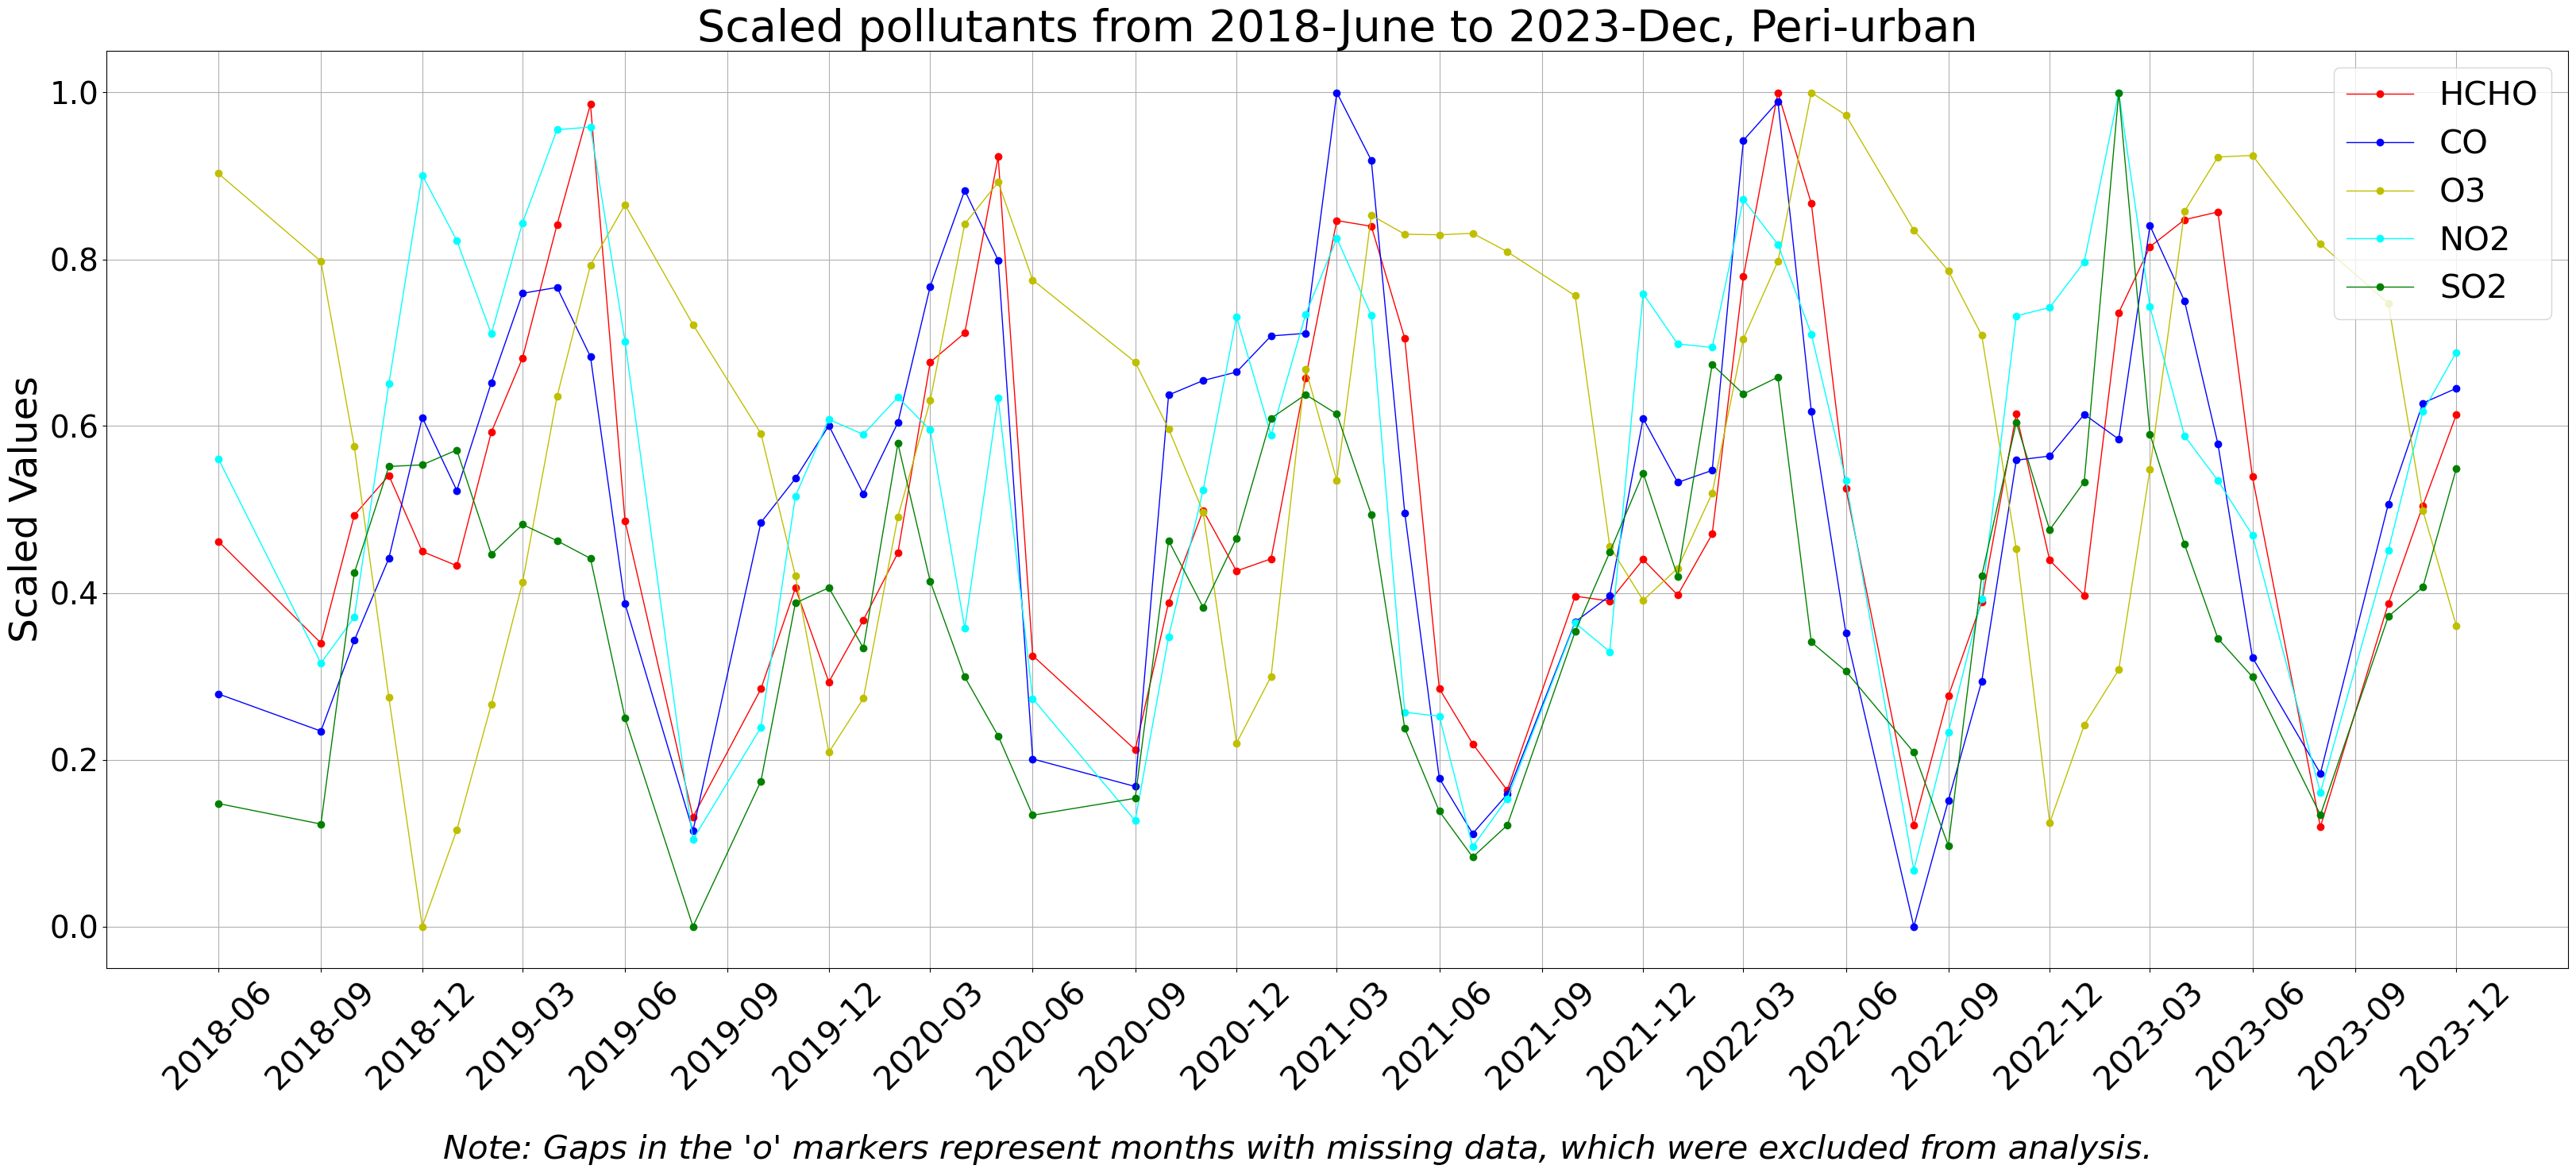

In [180]:
plt.figure(figsize=(40, 15))

# Plotting each pollutant
plot_values = [value for date, value in zip(months, HCHO_scaled) if pd.notnull(date)]
plt.plot(plot_dates, plot_values, color='r', label='HCHO',linewidth=1,marker='o')
plot_values = [value for date, value in zip(months, CO_scaled) if pd.notnull(date)]
plt.plot(plot_dates, plot_values, color='b', label='CO',linewidth=1,marker='o')
plot_values = [value for date, value in zip(months, O3_scaled) if pd.notnull(date)]
plt.plot(plot_dates, plot_values, color='y', label='O3',linewidth=1,marker='o') 
plot_values = [value for date, value in zip(months, NO2_scaled) if pd.notnull(date)] 
plt.plot(plot_dates, plot_values, color='cyan', label='NO2',linewidth=1,marker='o')
plot_values = [value for date, value in zip(months, SO2_scaled) if pd.notnull(date)]
plt.plot(plot_dates, plot_values, color='g', label='SO2',linewidth=1,marker='o')
plt.title('Scaled pollutants from 2018-June to 2023-Dec, Peri-urban', fontsize=40)
#plt.xlabel('Months', fontsize=35)
plt.ylabel('Scaled Values', fontsize=35)

start_date = pd.to_datetime("2018-06-01")
end_date = pd.to_datetime("2023-12-01")
custom_ticks = pd.date_range(start=start_date, end=end_date, freq="3MS")  # 3MS = every 3rd month

# Apply manual x-ticks and format them properly
plt.xticks(custom_ticks, custom_ticks.strftime("%Y-%m"), fontsize=30, rotation=45)  # Explicit x-tick labels
plt.yticks(fontsize=28)
# Adjust legend font size
plt.legend(fontsize=30)

plt.grid(True)
plt.figtext(0.5, -0.05, "Note: Gaps in the 'o' markers represent months with missing data, which were excluded from analysis.", 
            ha="center", fontsize=30, style="italic")

# Display the plot
plt.show()